In [50]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#Load the dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_15_decision_tree_classifier/iphone_purchase_records.csv")
column_names = df.columns[0:4]
df=pd.DataFrame(dataset, columns=column_names)

X = df.iloc[:, 0:3].values
y = df.iloc[:, -1].values

df.head(5)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [51]:
#Convert Gender to Number 
labelEncoder_gender =  LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

In [52]:
#Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [53]:
#Fit Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier.fit(X_train, y_train)

print('Decision Tree Classifier created')

Decision Tree Classifier created


In [54]:
#Make Predictions
y_pred = classifier.predict(X_test)


In [55]:
#Evaluate Performance of the Model
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[63  5]
 [ 3 29]]
Accuracy score: 0.92
Precision score: 0.8529411764705882
Recall score: 0.90625


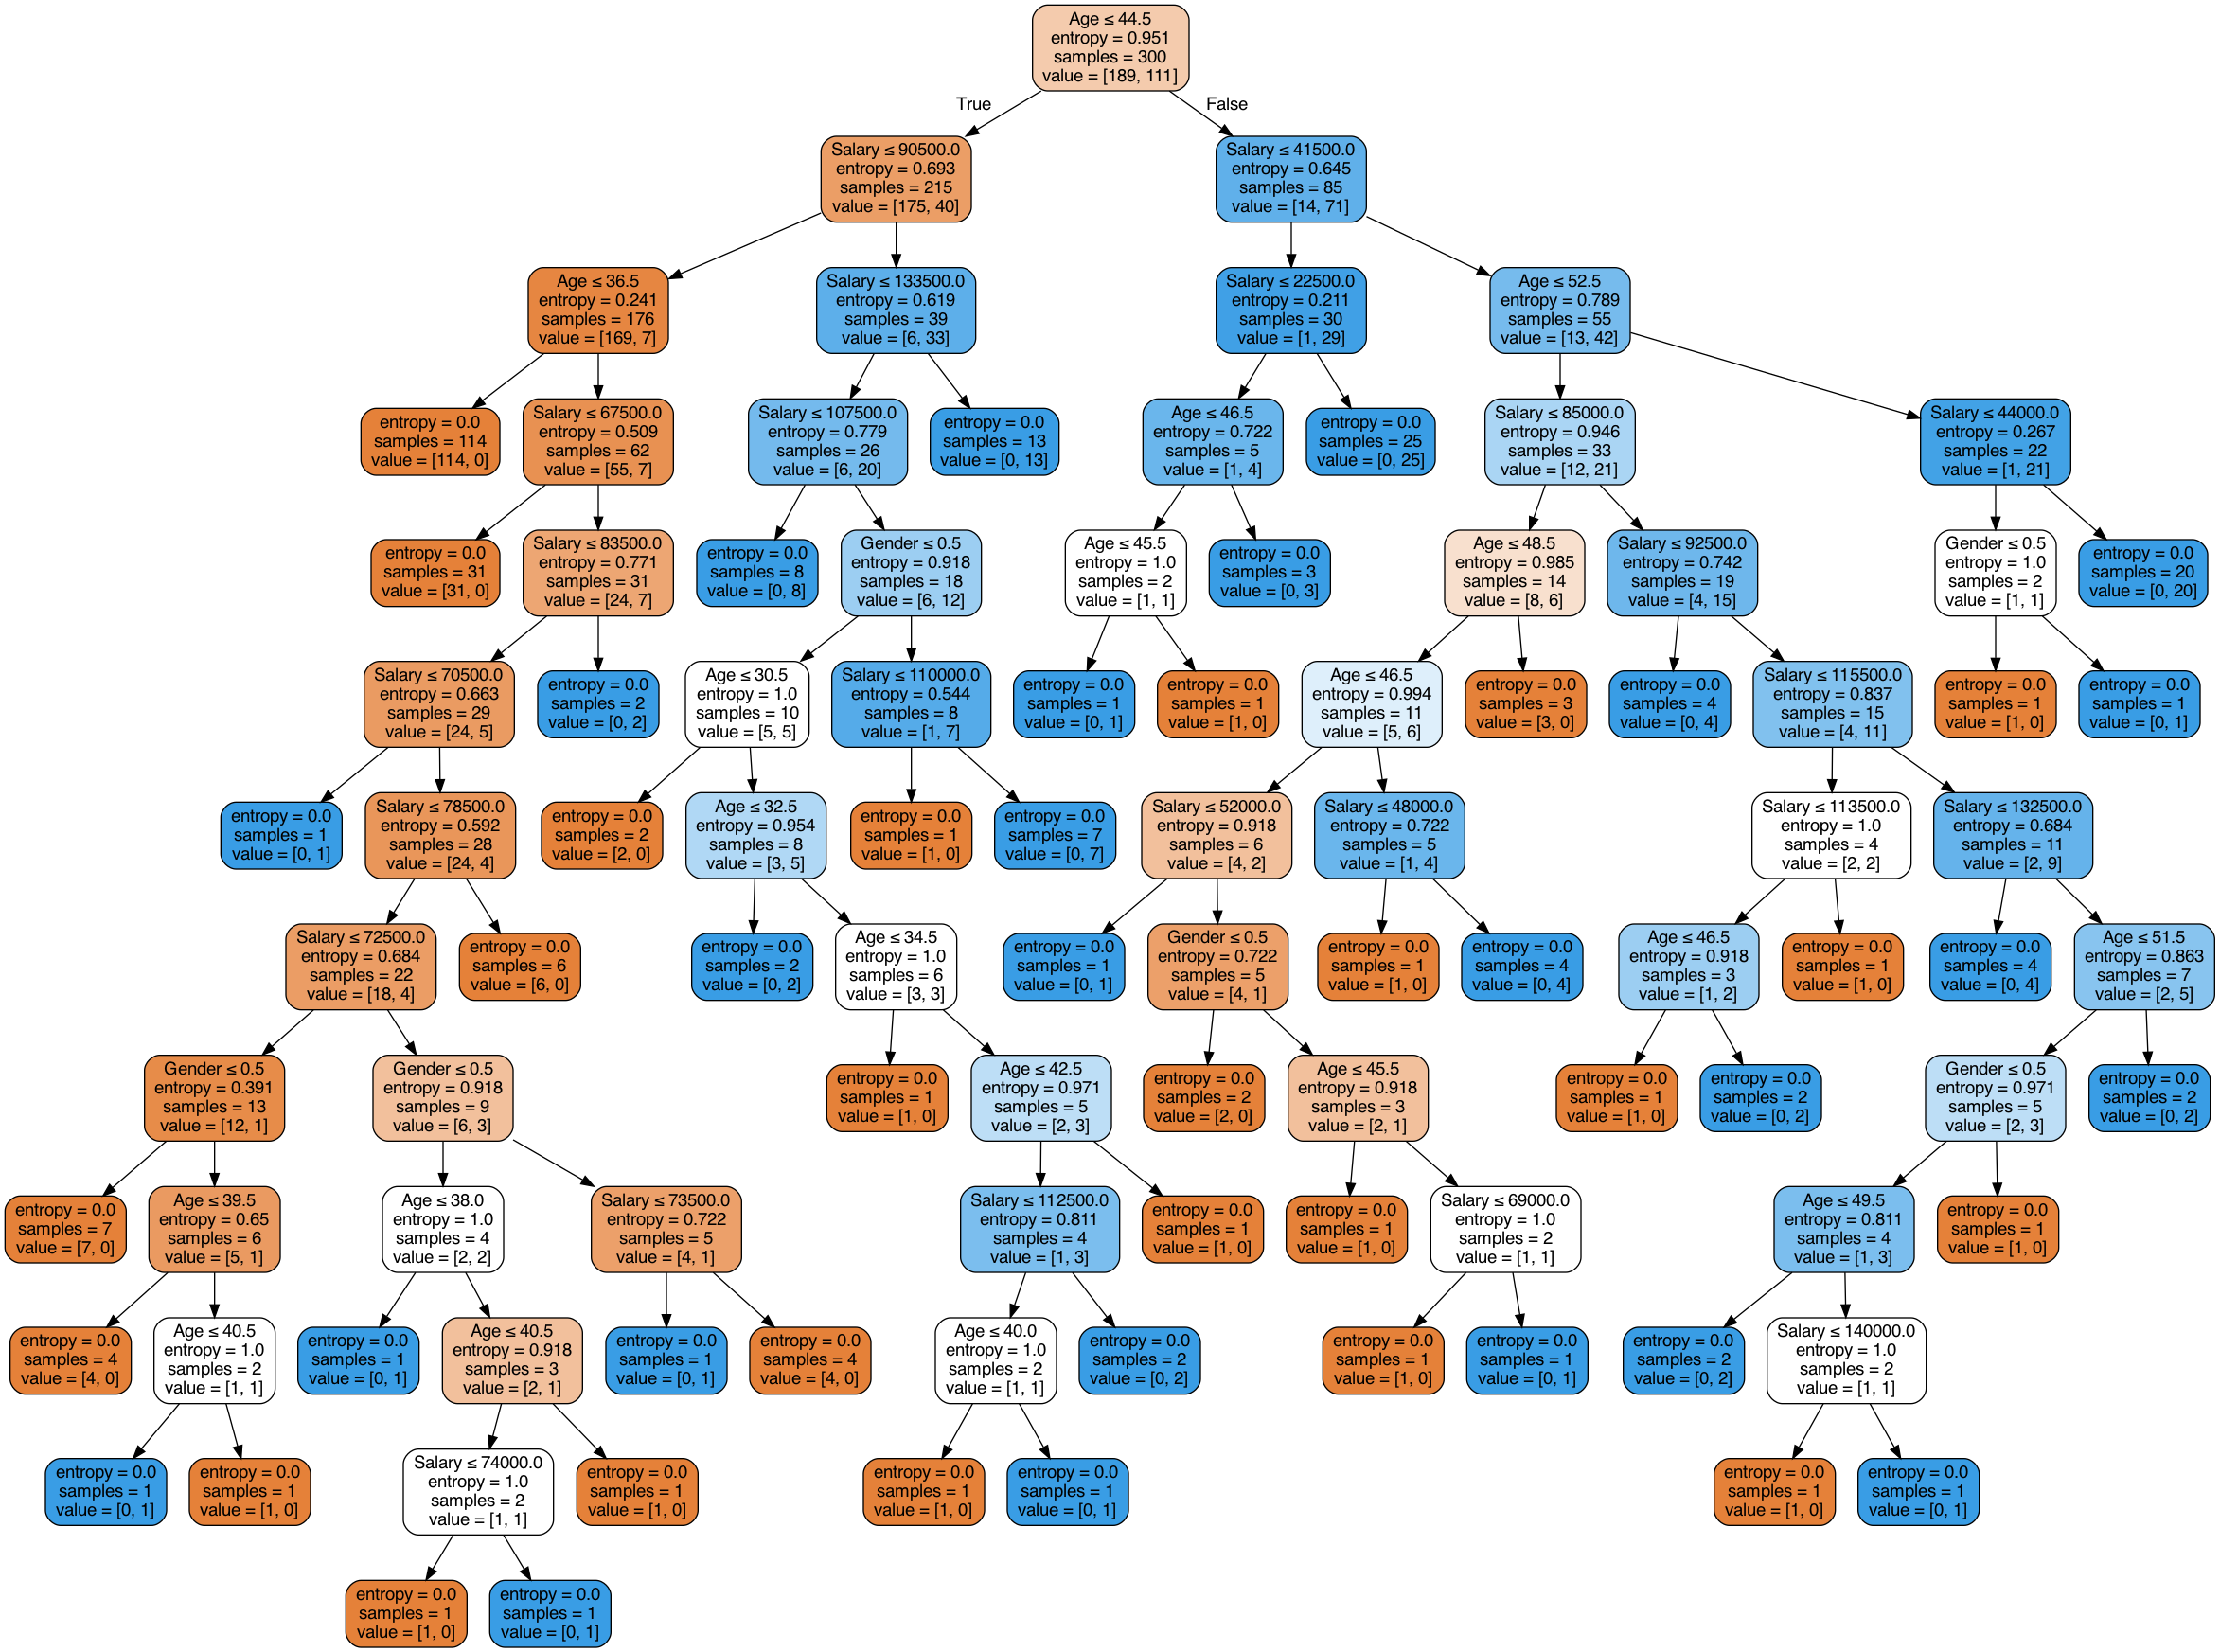

In [56]:
# Visualize the graph

feature_names = df.columns[0:3]
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())